# Лабораторная работа 5

# Анимация качения треугольника Рело по квадрату

Билина Вероника, 10.04.2025

# Задание 5.1. Начальное положение треугольника Рело и квадрата

## Реализация Заданя 5.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import relo

In [2]:
n=3
center=np.array([0.,0.])
r=10
N=100

In [3]:
relo_matrix=relo.regular_polygon_Relo(r=r,center=center,N=N)

In [4]:
square = np.array([[-r/2, -r/2], [r/2, -r/2], [r/2, r/2], [-r/2, r/2], [-r/2, -r/2]])

(np.float64(-5.538675134594813),
 np.float64(6.312177826491073),
 np.float64(-5.5),
 np.float64(5.500000000000001))

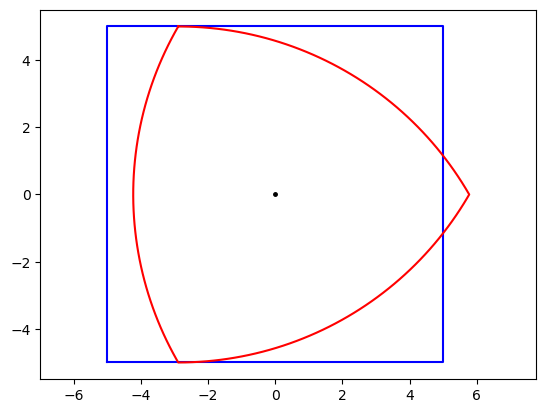

In [5]:
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

In [6]:
shift=[r/(3**(1/2))-r/2,0]
relo_matrix_shifted = relo_matrix - shift
center -= shift

(np.float64(-5.5),
 np.float64(5.500000000000002),
 np.float64(-5.5),
 np.float64(5.500000000000001))

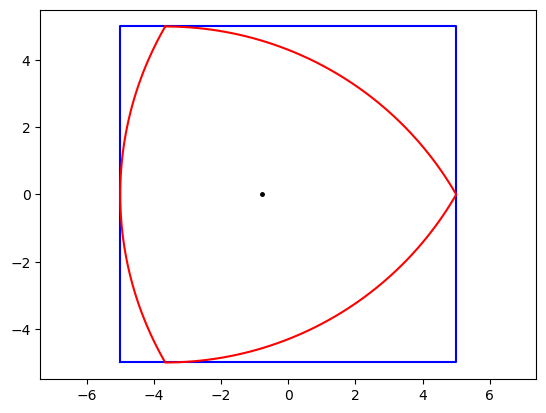

In [7]:
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

## Задание 5.2. Анимация поступательного движения треугольника Рело по окружности

In [8]:
N_frames=100

In [9]:
t_center = np.linspace(-np.pi, np.pi, N_frames)
center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])

(np.float64(-5.5),
 np.float64(5.500000000000002),
 np.float64(-5.5),
 np.float64(5.500000000000001))

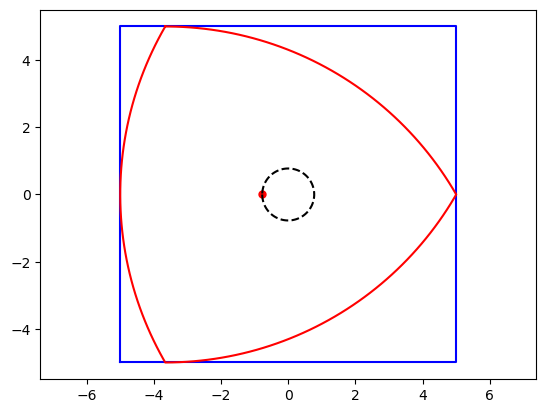

In [10]:
frame = 0
relo_matrix_shifted = relo_matrix + center_frame[frame]
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')


In [11]:
def draw_frame(r, N_frames, frame=0):
    shift=[r/(3**(1/2))-r/2,0]
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')

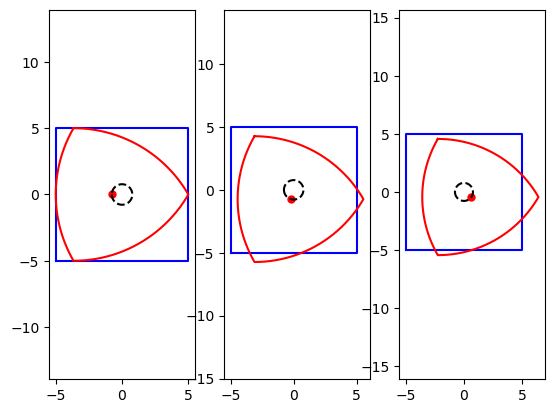

In [12]:
plt.figure()
N_frames = 100
plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)
plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=20)
plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=40)


In [13]:
from matplotlib.animation import FuncAnimation
%matplotlib widget

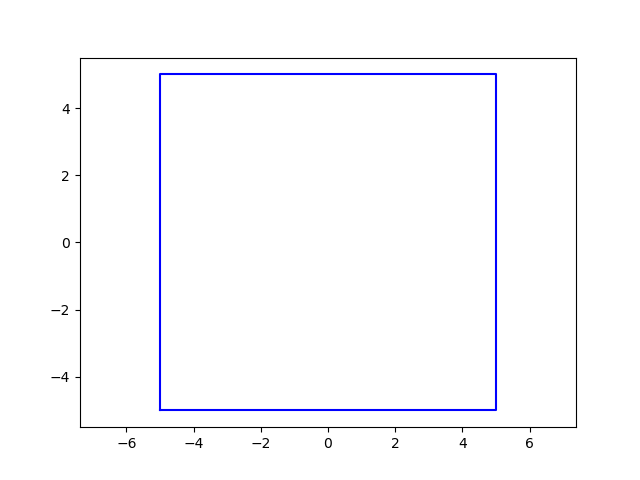

In [14]:
fig1=plt.figure()
ax1 = plt.axes()
plt.axis('equal')
line1, = ax1.plot(square[:,0],square[:,1],'b-') # объект для графика функции
line2, = ax1.plot([], [],'go') # объект для точки
line3,=ax1.plot([],[],'r-')
def at_frame(point):
    line2.set_data([point[0]], [point[1]])
    relo_matrix_shifted = relo_matrix+point
    line3.set_data(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1])
def init():
    global line2
    line1, = ax1.plot(square[:,0],square[:,1],'b-') # объект для графика функции
    line3,=ax1.plot([],[],'r-')
    line2, = ax1.plot([], [],'go') # объект для точки
    line4,=ax1.plot(center_frame[0,0],center_frame[0,1],'r.',markersize=10)
    line5,=ax1.plot(center_frame[:,0],center_frame[:,1],'k--')
FuncAnimation(fig1, at_frame, frames=center_frame, init_func=init,repeat=False, interval=20)

# Задние 5.3. Анимация качения треугольника Рело

In [15]:
rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
 [-np.sin(theta), np.cos(theta)]])
rotate_matrix(np.pi)

array([[-1.0000000e+00,  1.2246468e-16],
       [-1.2246468e-16, -1.0000000e+00]])

In [16]:
theta = np.pi/3
matrix = rotate_matrix(theta)
relo_matrix_rotated = np.array([np.dot(matrix,row) for row in relo_matrix])

(np.float64(-6.3508529610858835),
 np.float64(6.350852961085886),
 np.float64(-5.500000000000005),
 np.float64(5.500000000000001))

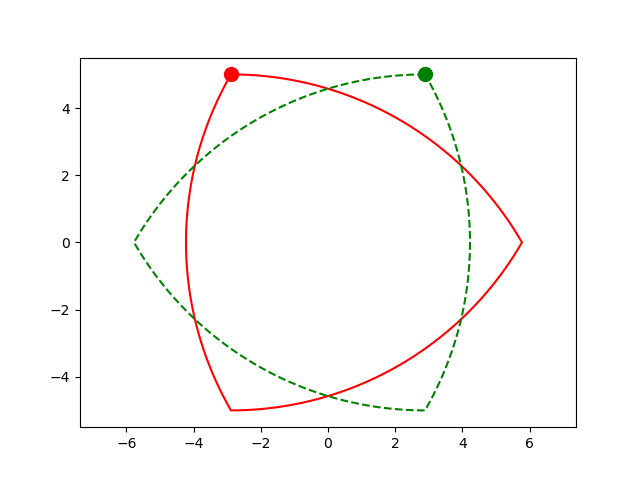

In [17]:
plt.figure()
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(relo_matrix[0,0],relo_matrix[0,1],'r.',markersize=20)
plt.plot(relo_matrix_rotated[:,0],relo_matrix_rotated[:,1],'g--')
plt.plot(relo_matrix_rotated[0,0],relo_matrix_rotated[0,1],'g.',markersize=20)
plt.axis('equal')

In [18]:
theta = np.linspace(0, 2*np.pi/3, N_frames)

(np.float64(-5.501735269668723),
 np.float64(5.536440663043177),
 np.float64(-5.5002878716042405),
 np.float64(5.506045303689057))

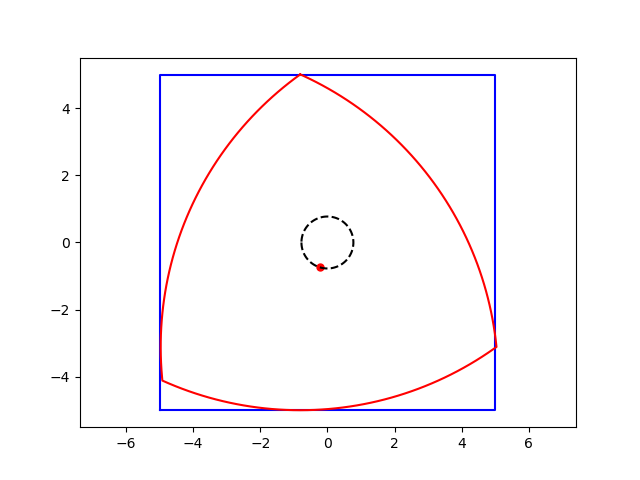

In [19]:
frame = 20
matrix = rotate_matrix(theta[frame])
relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
 + center_frame[frame])
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')


In [20]:
def draw_frame(r, N_frames, frame=0):
    shift=[r/(3**(1/2))-r/2,0]
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    theta = np.linspace(0, 2*np.pi/3, N_frames)
    matrix = rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
     + center_frame[frame])
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')

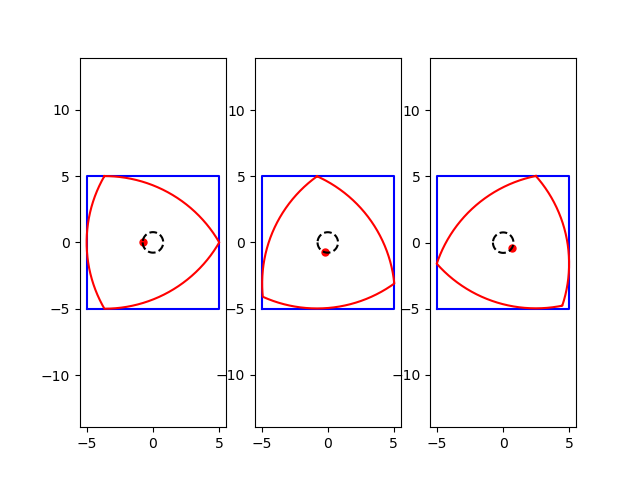

In [21]:
plt.figure()
plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)
plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=20)
plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=40)

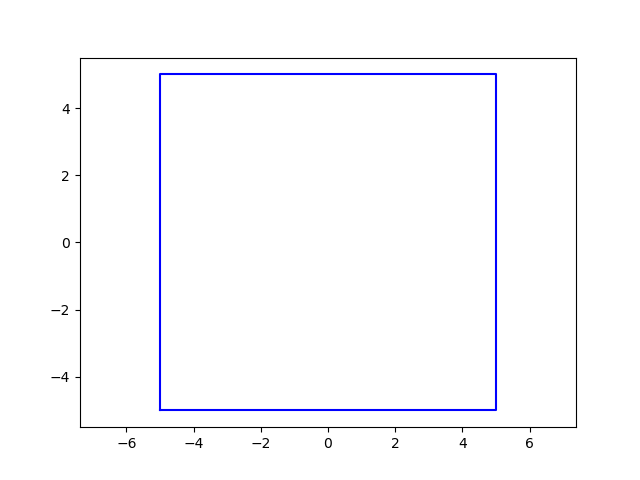

In [24]:
plt.close('all')
fig2=plt.figure()
ax2 = plt.axes()
plt.axis('equal')
line1, = ax2.plot(square[:,0],square[:,1],'b-') # объект для графика функции
line2, = ax2.plot([], [],'go') # объект для точки
line3,=ax2.plot([],[],'r-')
def at_frame2(frame):
    global center_frame
    point=center_frame[frame]
    line2.set_data([point[0]], [point[1]])
    matrix=rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
     + point)
    line3.set_data(relo_matrix_changed[:,0],relo_matrix_changed[:,1])
def init2():
    global line2
    global line3
    line1, = ax2.plot(square[:,0],square[:,1],'b-') # объект для графика функции
    line3,=ax2.plot([],[],'r-')
    line2, = ax2.plot([], [],'go') # объект для точки
    line4,=ax2.plot(center_frame[0,0],center_frame[0,1],'r.',markersize=10)
    line5,=ax2.plot(center_frame[:,0],center_frame[:,1],'k--')
FuncAnimation(fig2, at_frame2, frames=range(N_frames), init_func=init2,repeat=False, interval=20)

In [23]:
plt.close('all')